# WaterQuality - Open program
## Ammar Almasri

Healthy water is essential in our lives. It must be available to all people on this planet to prevent many potential diseases that could cause their owners to die. Therefore, the idea of investing in healthy water supplies has become an important issue in many countries, as it provides an economic benefit as it reduces health care costs that cost countries a lot of money.
In this project there is information on water data from different water bodies. Through these features that the dataset has, we will know who is transportable water.

## Data Sourcing



In [13]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import plotly.figure_factory as ff

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
df_water_quality=pd.read_csv('water_potability.csv')
df_water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


- ph-> pH of water
- Hardness-> Capacity of water to precipitate soap in mg/L
- Solids-> Total dissolved solids in ppm
- Chloramines-> Amount of Chloramines in ppm
- Sulfate-> Amount of Sulfates dissolved in mg/L
- Conductivity-> Electrical conductivity of water in μS/cm
- Organic_carbon-> Amount of organic carbon in ppm
- Trihalomethanes-> Amount of Trihalomethanes in μg/L
- Turbidity-> Measure of light emiting property of water in NTU (Nephelometric Turbidity Units)
- Potability-> Indicates if water is safe for human consumption

In [15]:
df_water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<AxesSubplot:>

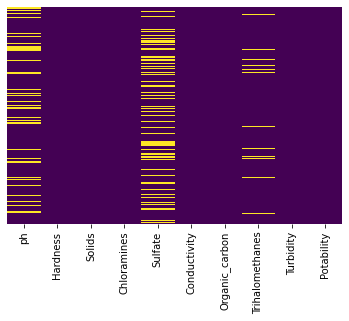

In [16]:
sns.heatmap(df_water_quality.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df_water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [18]:
nullValues_Ph=df_water_quality["ph"].isnull().sum()
nullValues_Sulfate=df_water_quality["Sulfate"].isnull().sum()
nullValues_Trihalomethanes=df_water_quality["Trihalomethanes"].isnull().sum()
print("Ph column has {} null values, Sulfate column has {} null values and Conductivity column has {} null values".format(nullValues_Ph,nullValues_Sulfate,nullValues_Trihalomethanes))

Ph column has 491 null values, Sulfate column has 781 null values and Conductivity column has 162 null values


There are 491 null values in ph column
There are 781 null values in Sulfate column
There are 162 null values in Trihalomethanes column

C:\Users\Ammar Almasri\anaconda3\envs\Water quality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



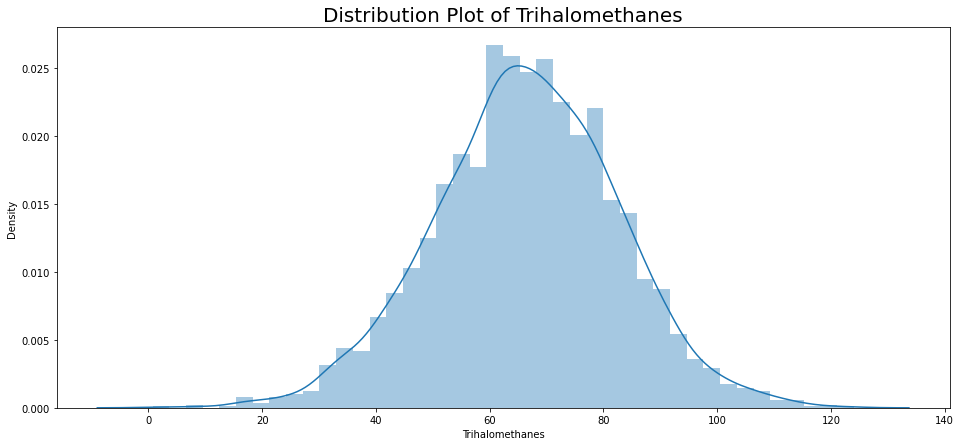

In [19]:
plt.figure(figsize = (16, 7))
sns.distplot(df_water_quality['Trihalomethanes'])
plt.title('Distribution Plot of Trihalomethanes', fontsize =  20)
plt.show()

In [20]:
df_water_quality=df_water_quality.dropna(subset=["ph","Sulfate"])
df_water_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2116 non-null   float64
 1   Hardness         2116 non-null   float64
 2   Solids           2116 non-null   float64
 3   Chloramines      2116 non-null   float64
 4   Sulfate          2116 non-null   float64
 5   Conductivity     2116 non-null   float64
 6   Organic_carbon   2116 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2116 non-null   float64
 9   Potability       2116 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 181.8 KB


In [21]:
df_water_quality['Cleaned_Trihalomethanes']=df_water_quality['Trihalomethanes'].fillna(df_water_quality['Trihalomethanes'].mean())
df_water_quality

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Cleaned_Trihalomethanes
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,100.341674
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,31.997993
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,54.917862
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,84.603556
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,62.798309
...,...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1,55.069304
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1,28.878601
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1,41.558501
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1,60.419921


C:\Users\Ammar Almasri\anaconda3\envs\Water quality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



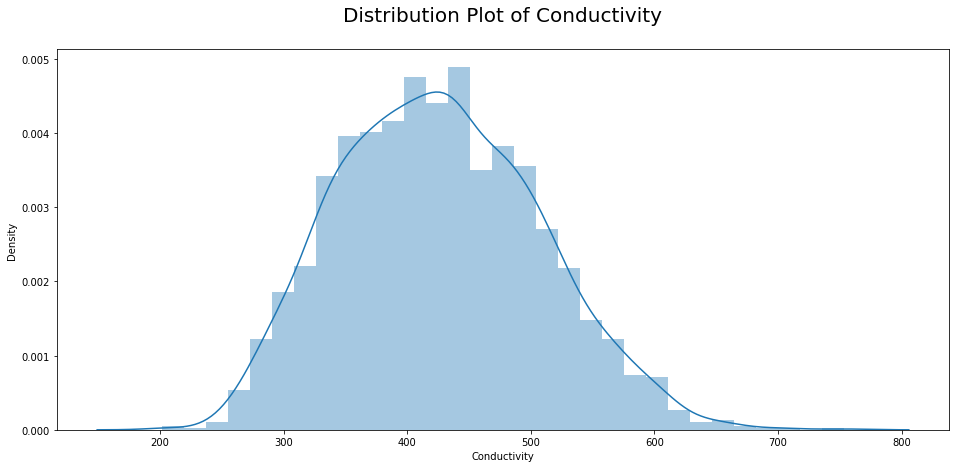

In [22]:
plt.figure(figsize = (16, 7))
sns.distplot(df_water_quality['Conductivity'])
plt.title('Distribution Plot of Conductivity\n', fontsize =  20)
plt.show()

In [23]:
fig = px.bar(df_water_quality, x=range(df_water_quality['Conductivity'].count()),
             y=sorted(df_water_quality['Conductivity']), labels={
                     'x': "Count",
                     'y': "Conductivity",
                     'color':'Potability'

                 },
             color=df_water_quality['Potability']
             ,template = 'plotly_dark')
fig.update_layout(title='Conductivity wrt Potability')
fig.show()

## Data Preprocessing

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'